In [1]:
#import libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("diabetes.csv")
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'correlation heatmap')

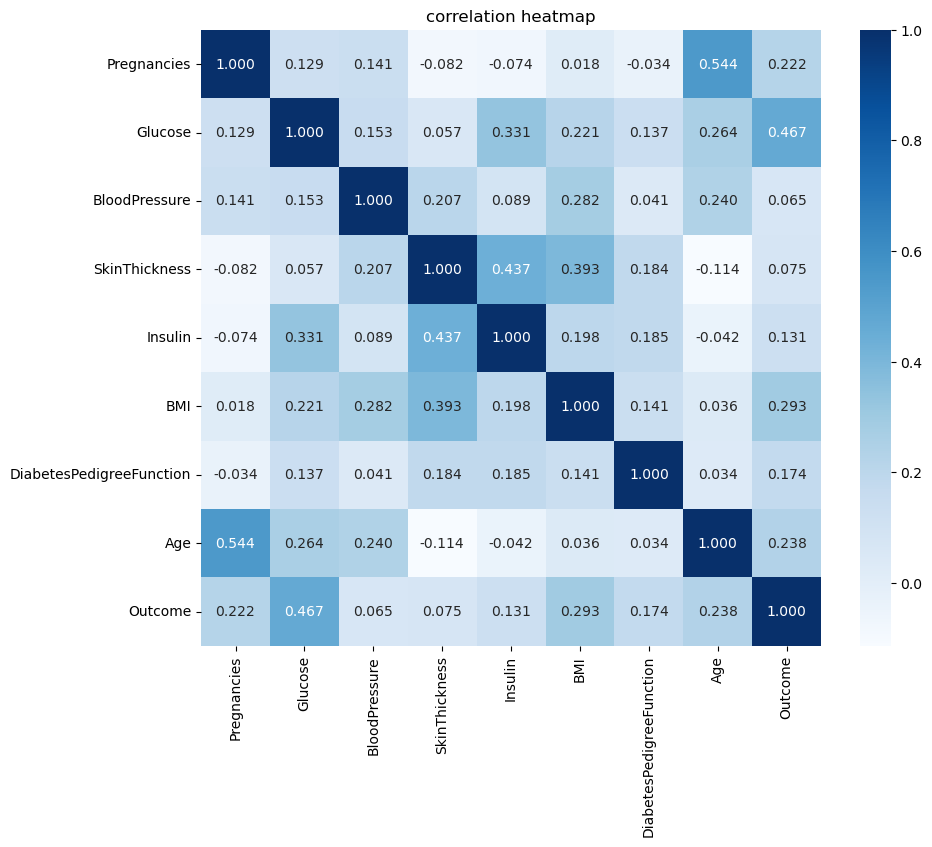

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".3f",cmap="Blues")
plt.title("correlation heatmap")

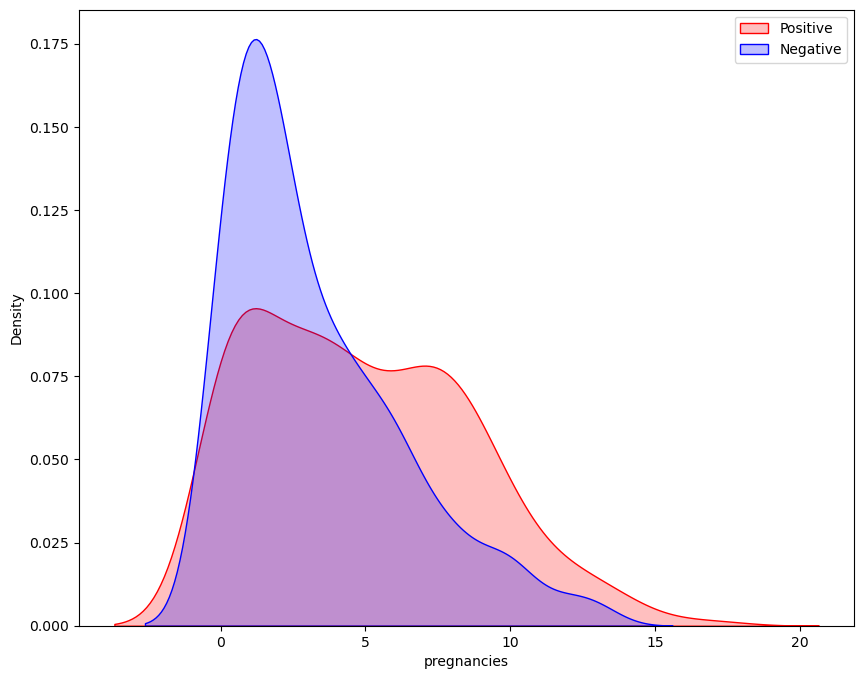

In [8]:
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="Red",shade=True)
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="Blue",shade=True)
kde.set_xlabel("pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

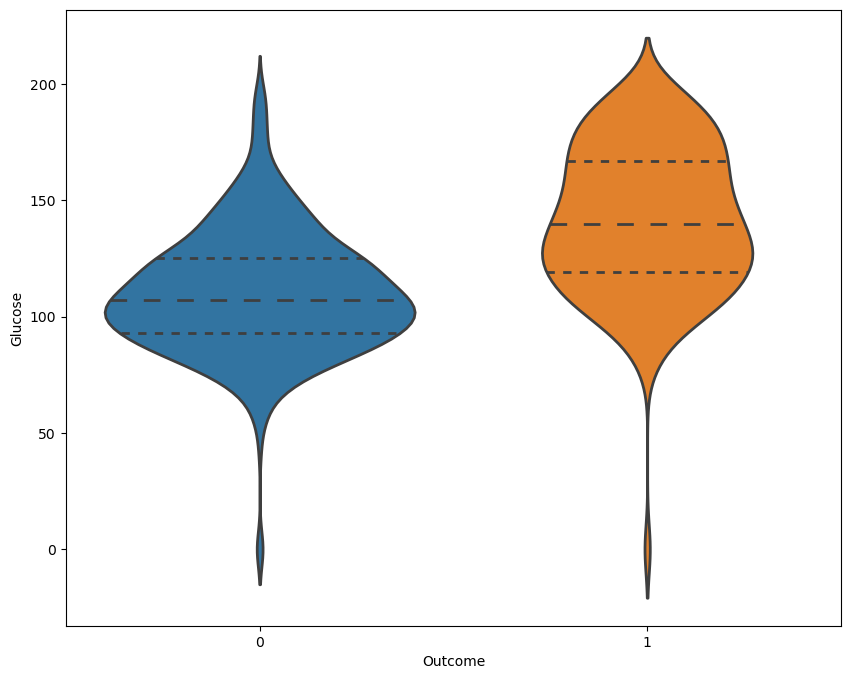

In [9]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,linewidth=2,inner="quart")


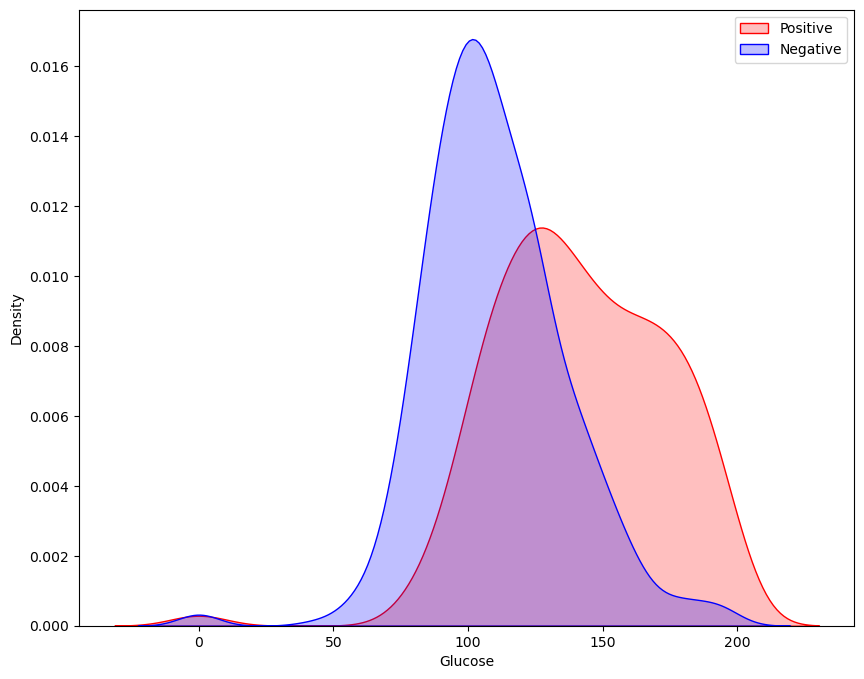

In [10]:
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1],color="Red",shade=True)
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0],color="Blue",shade=True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [11]:
dataset["GLucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].median())
dataset["BloodPressure"]=dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].mean())
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].mean())


In [12]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLucose
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1,148
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0,85
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1,183
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,89
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,137
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0,101
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0,122
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0,121
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1,126


In [13]:
x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]

In [14]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GLucose
0,6,148,72,35.000000,79.799479,33.6,0.627,50,148
1,1,85,66,29.000000,79.799479,26.6,0.351,31,85
2,8,183,64,20.536458,79.799479,23.3,0.672,32,183
3,1,89,66,23.000000,94.000000,28.1,0.167,21,89
4,0,137,40,35.000000,168.000000,43.1,2.288,33,137
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,101
764,2,122,70,27.000000,79.799479,36.8,0.340,27,122
765,5,121,72,23.000000,112.000000,26.2,0.245,30,121
766,1,126,60,20.536458,79.799479,30.1,0.349,47,126


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [17]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GLucose
464,10,115,98,20.536458,79.799479,24.0,1.022,34,115
223,7,142,60,33.000000,190.000000,28.8,0.687,61,142
393,4,116,72,12.000000,87.000000,22.1,0.463,37,116
766,1,126,60,20.536458,79.799479,30.1,0.349,47,126
570,3,78,70,20.536458,79.799479,32.5,0.270,39,78
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26,139
106,1,96,122,20.536458,79.799479,22.4,0.207,27,96
270,10,101,86,37.000000,79.799479,45.6,1.136,38,101
435,0,141,72,20.536458,79.799479,42.4,0.205,29,141


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
    
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

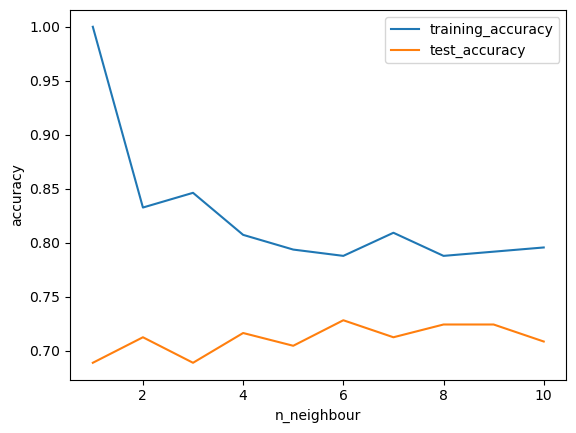

In [20]:
plt.plot(range(1,11),training_accuracy,label="training_accuracy")
plt.plot(range(1,11),test_accuracy,label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbour")
plt.legend()

In [21]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),": training accuracy")
print(knn.score(x_test,y_test),": test accuracy")

0.791828793774319 : training accuracy
0.7244094488188977 : test accuracy


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": training accuracy")
print(dt.score(x_test,y_test),": test accuracy")

1.0 : training accuracy
0.6968503937007874 : test accuracy


In [23]:
dt1=DecisionTreeClassifier(random_state=0,max_depth=6)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),": training accuracy")
print(dt1.score(x_test,y_test),": test accuracy")

0.857976653696498 : training accuracy
0.7362204724409449 : test accuracy


In [24]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": training accuracy")
print(mlp.score(x_test,y_test),": test accuracy")

0.7587548638132295 : training accuracy
0.6968503937007874 : test accuracy


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [26]:
mlp1=MLPClassifier(random_state=0)
mlp1.fit(x_train,y_train)
print(mlp1.score(x_train_scaled,y_train),": training accuracy")
print(mlp1.score(x_test_scaled,y_test),": test accuracy")

0.6459143968871596 : training accuracy
0.6614173228346457 : test accuracy


In [27]:
x_train_scaled


array([[ 1.89917664, -0.19475093,  2.11027079, ...,  1.60661512,
         0.06905859, -0.23631971],
       [ 0.98286551,  0.64046336, -1.03516641, ...,  0.62609815,
         2.37289284,  0.64911358],
       [ 0.06655438, -0.16381707, -0.04187045, ..., -0.02953111,
         0.32504017, -0.20352588],
       ...,
       [ 1.89917664, -0.62782501,  1.11697483, ...,  1.94028358,
         0.41036736, -0.69543326],
       [-1.1551938 ,  0.6095295 , -0.04187045, ..., -0.78467552,
        -0.35757739,  0.61631975],
       [-1.1551938 ,  0.11458769,  1.94472146, ..., -0.61784129,
        -1.04019494,  0.09161855]])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [29]:
y_predmlp=mlp1.predict(x_test_scaled)
cm=confusion_matrix(y_test,y_predmlp)
cm

array([[168,   0],
       [ 86,   0]], dtype=int64)

<AxesSubplot:>

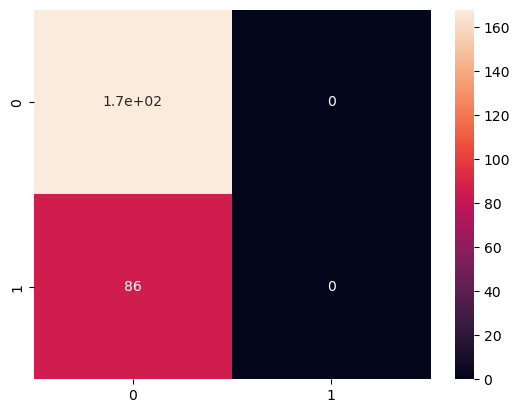

In [30]:
sns.heatmap(cm,annot=True)


In [31]:
print(classification_report(y_test,y_predmlp))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       168
           1       0.00      0.00      0.00        86

    accuracy                           0.66       254
   macro avg       0.33      0.50      0.40       254
weighted avg       0.44      0.66      0.53       254



In [32]:
# separating the data and labels
X = dataset.drop(columns = 'Outcome', axis=1)
Y = dataset['Outcome']

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [35]:
standardized_data = scaler.transform(X)

In [36]:
print(standardized_data)

[[ 0.63994726  0.84832379 -0.03198993 ...  0.46849198  1.4259954
   0.86604475]
 [-0.84488505 -1.12339636 -0.5283186  ... -0.36506078 -0.19067191
  -1.20506583]
 [ 1.23388019  1.94372388 -0.69376149 ...  0.60439732 -0.10558415
   2.01666174]
 ...
 [ 0.3429808   0.00330087 -0.03198993 ... -0.68519336 -0.27575966
  -0.02157407]
 [-0.84488505  0.1597866  -1.02464727 ... -0.37110101  1.17073215
   0.14279979]
 [-0.84488505 -0.8730192  -0.19743282 ... -0.47378505 -0.87137393
  -0.94206766]]


In [37]:
X = standardized_data
Y = dataset['Outcome']

In [38]:
print(X)
print(Y)

[[ 0.63994726  0.84832379 -0.03198993 ...  0.46849198  1.4259954
   0.86604475]
 [-0.84488505 -1.12339636 -0.5283186  ... -0.36506078 -0.19067191
  -1.20506583]
 [ 1.23388019  1.94372388 -0.69376149 ...  0.60439732 -0.10558415
   2.01666174]
 ...
 [ 0.3429808   0.00330087 -0.03198993 ... -0.68519336 -0.27575966
  -0.02157407]
 [-0.84488505  0.1597866  -1.02464727 ... -0.37110101  1.17073215
   0.14279979]
 [-0.84488505 -0.8730192  -0.19743282 ... -0.47378505 -0.87137393
  -0.94206766]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(768, 9) (614, 9) (154, 9)


In [41]:
from sklearn import svm

In [42]:
classifier = svm.SVC(kernel='linear')

In [43]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [44]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [46]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [47]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7792207792207793


In [51]:
input_data = (8,183,64,20.536458,79.799479,23.3,0.672,32,183)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.23388019  1.94372388 -0.69376149 -0.63065363 -0.41776815 -1.33182125
   0.60439732 -0.10558415  2.01666174]]
[1]
The person is diabetic


In [ ]:
dataset.head(5)